# EDA (Exploratory Data And Analysis) 

## Data Salary

### Import Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn')

### Load dataset

In [4]:
df_salary = pd.read_csv('salary_data.csv')

ada berapa banyak baris data dan kolom data ? 

In [6]:
brs, klm = df_salary.shape
print('banyak baris data =', brs)
print('banyak kolom data =', klm)

banyak baris data = 30
banyak kolom data = 2


ada kolom data apa saja ? 

In [7]:
df_salary.columns.values

array(['YearsExperience', 'Salary'], dtype=object)

lihat sample data ?

In [8]:
df_salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [11]:
df_salary.tail(3)

,YearsExperience,Salary
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [10]:
df_salary.sample(10)

,YearsExperience,Salary
13,4.1,57081.0
18,5.9,81363.0
26,9.5,116969.0
5,2.9,56642.0
1,1.3,46205.0
20,6.8,91738.0
15,4.9,67938.0
11,4.0,55794.0
7,3.2,54445.0
24,8.7,109431.0


menampilkan informasi kolom data dan tipe data serta kemungkinan adanya missing value

In [12]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


missing value ? 

In [13]:
df_salary.isna().any()

YearsExperience    False
Salary             False
dtype: bool

In [14]:
df_salary.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

describe data ? 

In [15]:
df_salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


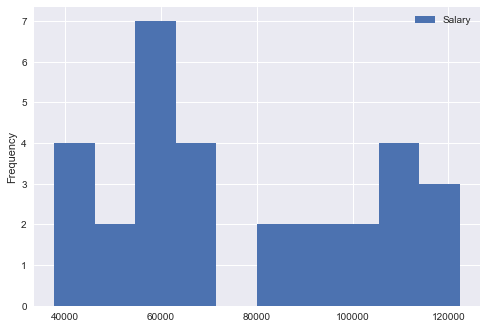

In [16]:
df_salary.plot(x='YearsExperience', kind='hist');

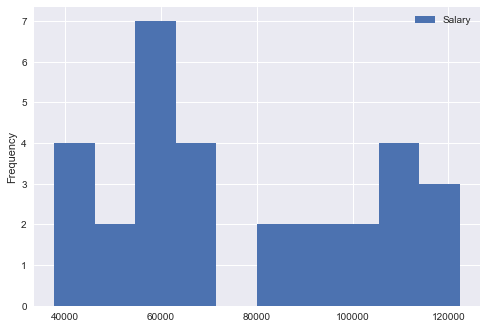

In [25]:
df_salary.plot.hist(x='YearsExperience');

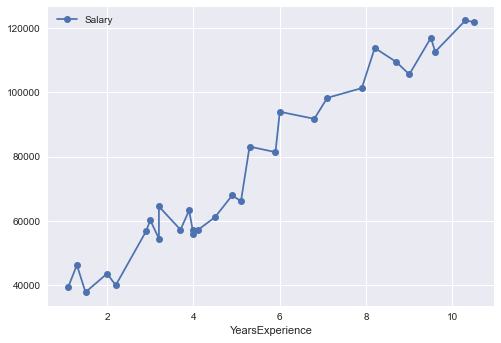

In [18]:
df_salary.plot(x='YearsExperience', y='Salary', kind='line', marker='o');

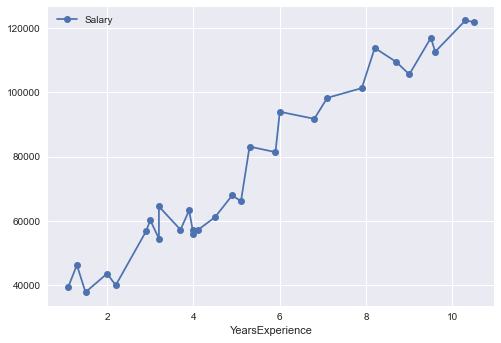

In [24]:
df_salary.plot.line(x='YearsExperience', y='Salary', marker='o');

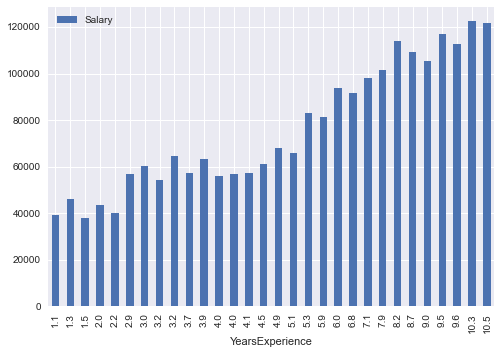

In [19]:
df_salary.plot(x='YearsExperience', y='Salary', kind='bar');

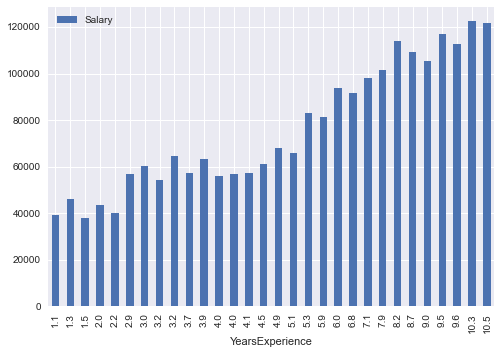

In [23]:
df_salary.plot.bar(x='YearsExperience', y='Salary');

In [20]:
df_salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


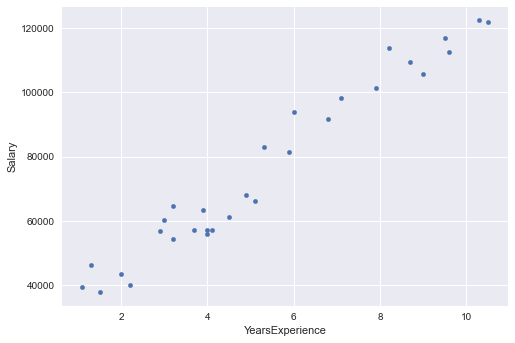

In [21]:
df_salary.plot(x='YearsExperience', y='Salary', kind='scatter');

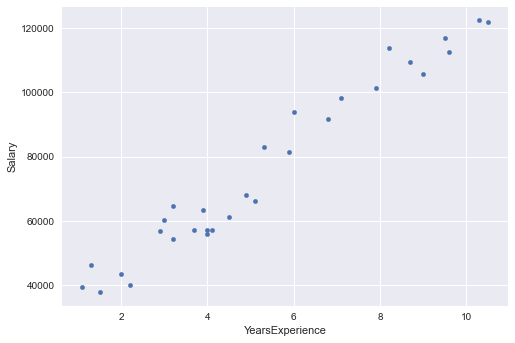

In [22]:
df_salary.plot.scatter(x='YearsExperience', y='Salary');

In [26]:
import seaborn as sns 

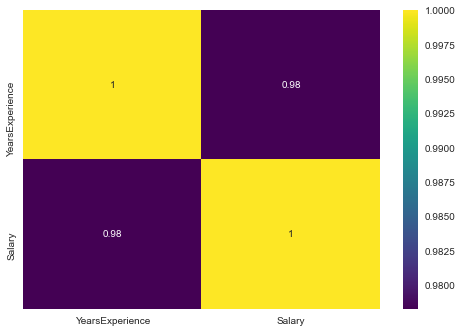

In [29]:
sns.heatmap(df_salary.corr(), annot=True, cmap='viridis');

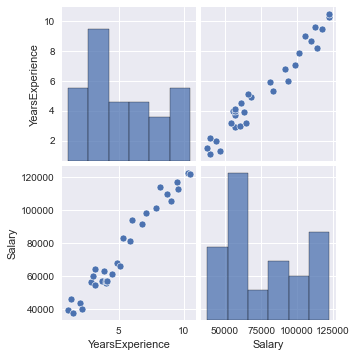

In [30]:
sns.pairplot(df_salary);

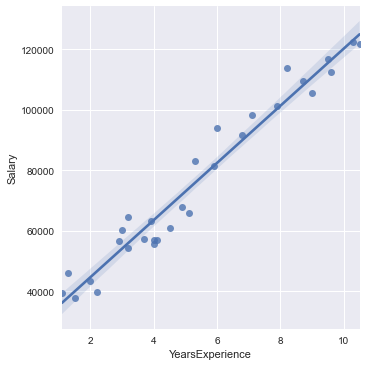

In [31]:
sns.lmplot(x='YearsExperience', y='Salary', data=df_salary);

In [32]:
df_salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### Mempersiapkan features dan target

In [34]:
X = df_salary[['YearsExperience']]
y = df_salary['Salary']

In [35]:
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [36]:
y[:5]

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

### Preparing Train dan Test Dataset

In [37]:
from sklearn.model_selection import train_test_split

### Splitting Dataset

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=20)

In [39]:
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (24, 1)
X_test: (6, 1)
y_train: (24,)
y_test: (6,)


### Import Library LinearRegression (ML Algorithm untuk melakukan Forecasting)

In [40]:
from sklearn.linear_model import LinearRegression

### Train Model

In [41]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Testing Model

In [42]:
y_pred = model.predict(X_test)
y_pred

array([ 65109.49052434,  47073.70103606,  38530.43233108,  63210.98636768,
       125861.62353752,  64160.23844601])

In [43]:
y_test

13     57081.0
4      39891.0
1      46205.0
10     63218.0
29    121872.0
12     56957.0
Name: Salary, dtype: float64

### Evaluasi Model

In [46]:
from sklearn.metrics import r2_score

acc = r2_score(y_test, y_pred)

print('Accuracy Model =', acc)
print(f'Accuracy Model = {acc*100:,.2f}%')

Accuracy Model = 0.9441299149555877
Accuracy Model = 94.41%


### intercept dan slope

y = a + bX

a = intercept
b = slope

y = 26190.15531277802 + 9492.52078331 * X

In [47]:
print('Intercept :', model.intercept_)
print('Slope :', model.coef_)

Intercept : 26190.15531277802
Slope : [9492.52078331]


### melakukan prediksi dengan nilai - nilai yang baru

### manual hitung

In [53]:
X = float(input('Experience (Year) ? '))

y = 26190.15531277802 + 9492.52078331 * X

print(f'Perkiraan Gaji untuk Pengalaman Kerja Selama: {X:,.1f} Tahun adalah: {y:,.2f} USD')

Experience (Year) ? 30
Perkiraan Gaji untuk Pengalaman Kerja Selama: 30.0 Tahun adalah: 310,965.78 USD


### model melakukan forecasting terhadap sebuah nilai X (pengalaman kerja)

In [59]:
X = 30
y = model.predict([[X]])
print(f'Perkiraan Gaji untuk Pengalaman Kerja Selama: {X:,.1f} Tahun adalah: {y[0]:,.2f} USD')

Perkiraan Gaji untuk Pengalaman Kerja Selama: 30.0 Tahun adalah: 310,965.78 USD


---

In [60]:
df_iris = pd.read_csv('iris.csv')

In [61]:
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [62]:
df_iris.shape

(150, 6)

In [63]:
df_iris.Species.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

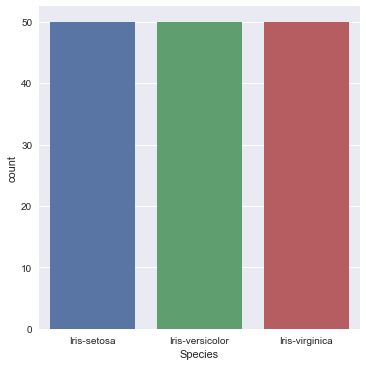

In [64]:
sns.catplot(x='Species', data=df_iris, kind='count');

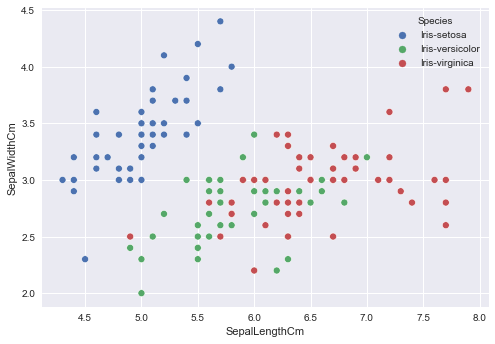

In [65]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=df_iris, hue='Species');

In [66]:
df_iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### menetapkan features dan target

In [67]:
X = df_iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df_iris['Species']

### splitting dataset

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

### Train Model

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
model = LogisticRegression()

In [74]:
model.fit(X_train, y_train)

LogisticRegression()

### Testing Model

In [75]:
y_pred = model.predict(X_test)

In [77]:
y_test[:5]

73     Iris-versicolor
18         Iris-setosa
118     Iris-virginica
78     Iris-versicolor
76     Iris-versicolor
Name: Species, dtype: object

In [78]:
y_pred[:5]

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor'], dtype=object)

### Evaluasi Model

In [79]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

print(f'Accuracy Model = {acc*100:,.2f}%')

Accuracy Model = 100.00%


In [81]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

